<h2>Exploratory Data Analysis - Python</h2>

This following exploratory data analysis is one of the principal component of Data Science. First of all, the exploratory data analysis help the data scientist / or the data engineer to understand the DATA properly in aspect of: data quality | data exploration | business main characteristics and the data can tell us to help the hypothesis formulation.

Author: Luciano Nieto    |     Date: 2/1/19

<H6> In this example, we will be work on Python BTW it should be developed in many languages.

In [1]:
#library imports

import pandas as pd # our best friend in this journey
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt #use in data quality transformations

<h5> show where you are:

In [3]:
ls

 O volume na unidade C não tem nome.
 O Número de Série do Volume é F0A2-2F70

 Pasta de C:\projects\principal\datascience\1_exploratory_analysis

05/02/2020  22:07    <DIR>          .
05/02/2020  22:07    <DIR>          ..
05/02/2020  21:49    <DIR>          .ipynb_checkpoints
05/02/2020  22:07            10.519 _exploratory.ipynb
05/02/2020  21:49            16.018 Car_sales.csv
05/02/2020  21:49                50 source.txt
05/02/2020  21:49            10.867 Untitled.ipynb
               4 arquivo(s)         37.454 bytes
               3 pasta(s)   412.760.805.376 bytes disponíveis


In [207]:
#read the file
df = pd.read_csv('Car_Sales.csv')
#source: https://www.kaggle.com/gagandeep16/car-sales/data#

In [16]:
#see the size of your dataframe (lines qty, columns qty)
df.shape

(157, 16)

In [20]:
#show first 5 lines of your dataframe
df.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [23]:
# Check Null values across the columns (rows qty)
df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [85]:
#go deep "__year_reasle_value"
df["__year_resale_value"].isna().sum() / df["__year_resale_value"].count()

0.2975206611570248

In [199]:
#fill the blank values
#here, we could predict or fill with a value that variable, but its not our scope yet.

df = df.fillna(0)

In [200]:
#adjusting column names

df.columns = df.columns.str.replace('__','')

In [21]:
#describing the dataset

df.describe()

,Sales_in_thousands,year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,52.998076,13.928854,27.041828,3.041401,184.764331,106.802548,70.696815,186.150318,3.334994,17.837580,23.388535,76.062144
std,68.029422,12.609543,14.588537,1.069570,58.434177,11.471894,6.639513,20.070059,0.732713,4.131794,5.358494,26.441984
min,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.114000,7.750000,17.885000,2.300000,148.000000,103.000000,68.400000,177.500000,2.958000,15.800000,21.000000,58.758249
50%,29.450000,13.025000,22.695000,3.000000,175.000000,107.000000,70.500000,187.800000,3.340000,17.200000,24.000000,71.838039
75%,67.956000,18.140000,31.930000,3.500000,215.000000,112.200000,73.400000,196.100000,3.778000,19.500000,26.000000,89.401935
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [24]:
#add visuals: - import seaborn library =)
import seaborn as sns

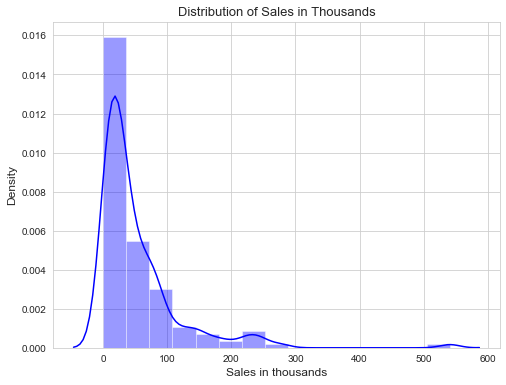

In [47]:
#calculate distribution accross the measures:

x = df["Sales_in_thousands"]
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(x,  kde=True, color="blue", bins=15, ax=ax)
ax.set_title('Distribution of Sales in Thousands', fontsize= 13)
plt.ylabel("Density", fontsize= 12)
plt.xlabel("Sales in thousands", fontsize= 12)
plt.show()

In [64]:
df.head(1)

,Manufacturer,Model,Sales_in_thousands,year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.28015


In [226]:
#grouping by year of launch
#extract year in another column

#1) extract & convert:

df["Latest_Launch"] = df["Latest_Launch"].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y'))

In [227]:
#2) extract the year and create new column:

df["Latest_Launch_Year"] = df["Latest_Launch"].dt.year

In [89]:
#3) Grouping & Show

df.groupby("Latest_Launch_Year").agg({"Sales_in_thousands" : 'sum'})

,Sales_in_thousands
Latest_Launch_Year,
2008,27.609
2009,100.635
2011,3717.405
2012,4475.049


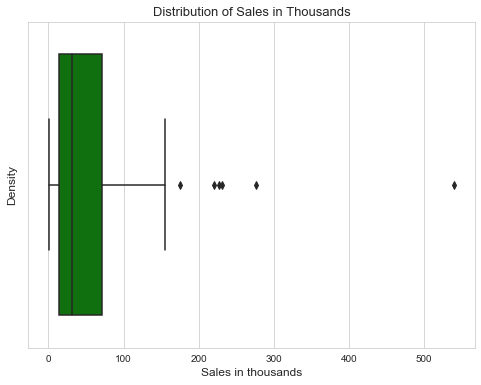

In [113]:
# go deeply in 2012:
#filter & show:

d = df[df["Latest_Launch_Year"]==2012]["Sales_in_thousands"]

fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(d,  color="green", ax=ax)
ax.set_title('Distribution of Sales in Thousands', fontsize= 13)
plt.ylabel("Density", fontsize= 12)
plt.xlabel("Sales in thousands", fontsize= 12)
plt.show()

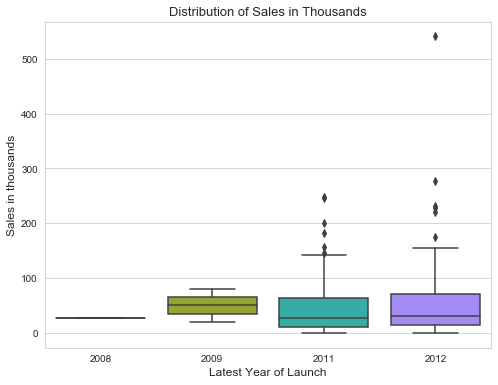

In [232]:
#year comparison
x = df[["Latest_Launch_Year","Sales_in_thousands"]]

fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Latest_Launch_Year',y='Sales_in_thousands',palette = "husl", saturation= 12, data=x , ax=ax)
ax.set_title('Distribution of Sales in Thousands', fontsize= 13)
plt.ylabel("Sales in thousands", fontsize= 12)
plt.xlabel("Latest Year of Launch", fontsize= 12)
plt.show()

In [208]:
#get and compare the top 10 manufacturers sales:

rank = df.groupby("Manufacturer")["Sales_in_thousands"].sum().rank(ascending=False).to_frame().rename(columns={"Sales_in_thousands" : 'Rank'})

#add rank column:
df = df.set_index('Manufacturer').join(rank, on = 'Manufacturer')

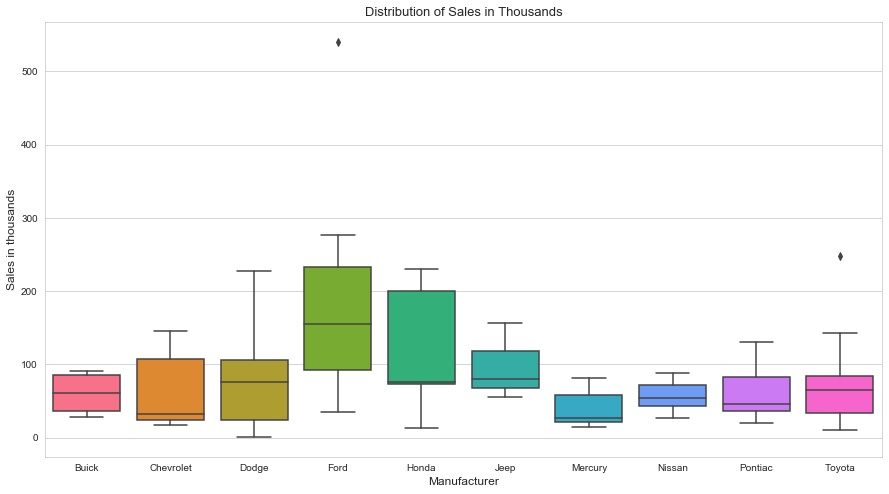

In [223]:
# boxplot Top 10 Manufacturers.

x = df[df["Rank"]<=10][["Sales_in_thousands"]].reset_index()


fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x = 'Manufacturer',y='Sales_in_thousands',palette = "husl", saturation= 12, data=x , ax=ax)
ax.set_title('Distribution of Sales in Thousands', fontsize= 13)
plt.ylabel("Sales in thousands", fontsize= 12)
plt.xlabel("Manufacturer", fontsize= 12)
plt.show()

In [241]:
#Descriptive Analysis:

#select descriptive variables from dataset:
desc = ["Engine_size","Horsepower","Wheelbase","Width","Length","Curb_weight","Fuel_capacity","Fuel_efficiency","Power_perf_factor"]

#in this part, we can see the correlation between that variables:
df[desc].corr(method="pearson")

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Engine_size,1.000000,0.837360,0.472130,0.690398,0.541424,0.760043,0.663022,-0.734622,0.818528
Horsepower,0.837360,1.000000,0.286308,0.539158,0.393364,0.610131,0.499907,-0.611332,0.992994
Wheelbase,0.472130,0.286308,1.000000,0.683135,0.839639,0.651016,0.654044,-0.497931,0.258852
Width,0.690398,0.539158,0.683135,1.000000,0.710435,0.720927,0.656302,-0.602546,0.512025
Length,0.541424,0.393364,0.839639,0.710435,1.000000,0.627163,0.563540,-0.446756,0.354095
Curb_weight,0.760043,0.610131,0.651016,0.720927,0.627163,1.000000,0.863968,-0.818402,0.612071
Fuel_capacity,0.663022,0.499907,0.654044,0.656302,0.563540,0.863968,1.000000,-0.801512,0.501184
Fuel_efficiency,-0.734622,-0.611332,-0.497931,-0.602546,-0.446756,-0.818402,-0.801512,1.000000,-0.607495
Power_perf_factor,0.818528,0.992994,0.258852,0.512025,0.354095,0.612071,0.501184,-0.607495,1.000000


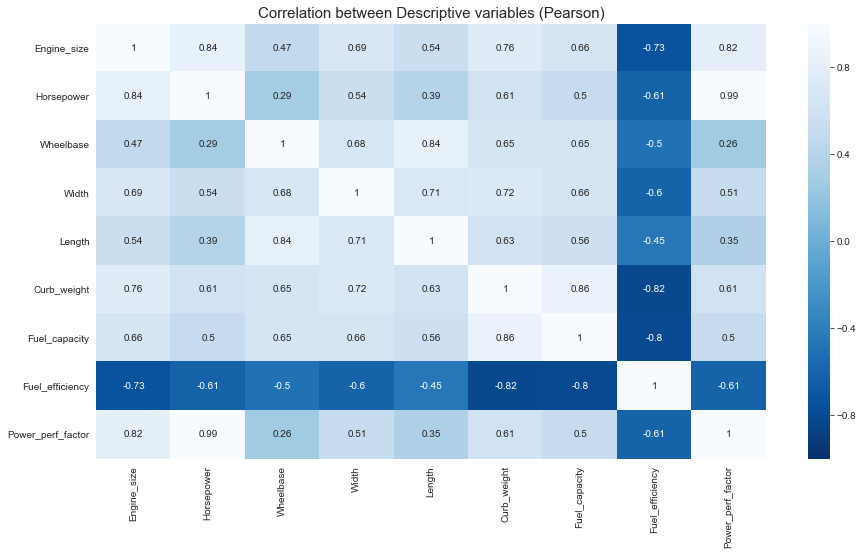

In [258]:
#see the correlation in a heatmap:
corr = df[desc].corr(method="pearson")


fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(corr,vmin=-1, annot=True,cmap="Blues_r", vmax=1, ax=ax)
ax.set_title('Correlation between Descriptive variables (Pearson)', fontsize= 15)
plt.show()

#possible cmap = Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

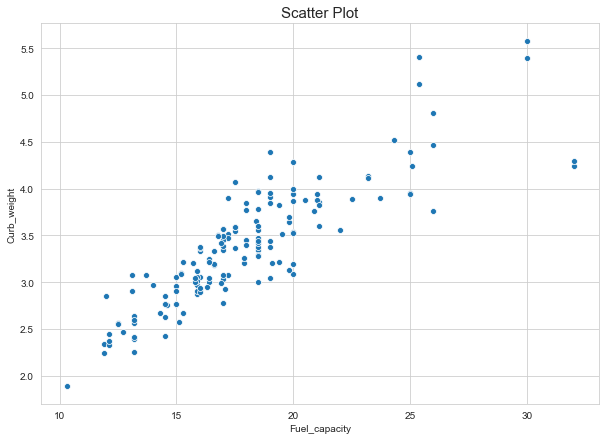

In [260]:
#lets go deeply:

#E.G. of strong pearson relationship.

x = df[["Fuel_capacity","Curb_weight"]]

# correlation between “Fuel_capacity” and ”Curb_weight”

fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(x="Fuel_capacity", y="Curb_weight", data=x)
ax.set_title('Scatter Plot', fontsize= 15)
plt.show()

In [261]:
desc

['Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

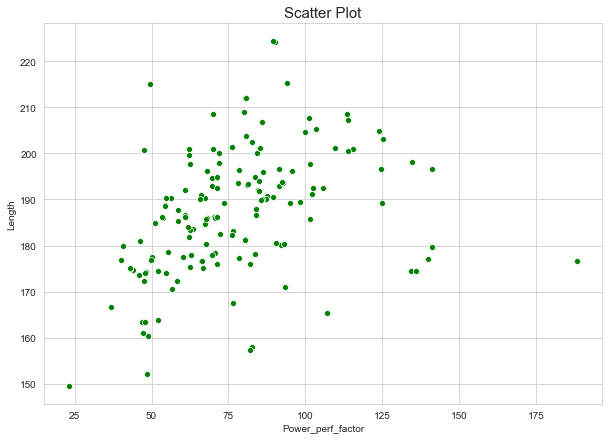

In [263]:
#E.G. of WEAK pearson relationship.

x = df[["Power_perf_factor","Length"]]

# correlation between “Fuel_capacity” and ”Curb_weight”

fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(x="Power_perf_factor", color="green",y="Length", data=x)
ax.set_title('Scatter Plot', fontsize= 15)
plt.show()